# Advanced Image Classification with Transfer Learning on CIFAR-10

### Project Overview
This project showcases an advanced approach to image classification by implementing **transfer learning** and **data augmentation**. Instead of building a model from scratch, it leverages a pre-trained VGG16 network to achieve high accuracy on the CIFAR-10 dataset with minimal training time. This project demonstrates proficiency in using modern deep learning techniques to solve computer vision problems efficiently.

### Dataset
The model was trained and evaluated on the **CIFAR-10 dataset**, which consists of 60,000 32x32 color images across 10 classes:
- airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

### Methodology
1.  **Transfer Learning:** A pre-trained **VGG16 model**, which was trained on the massive ImageNet dataset, was used as the convolutional base. The layers of the VGG16 model were **frozen** to utilize their learned feature extraction capabilities without modifying their weights.
2.  **Custom Classifier:** A new classifier was added on top of the VGG16 base, consisting of a `Flatten` layer, a `Dense` layer with `relu` activation, a `Dropout` layer to prevent overfitting, and a final `Dense` layer for the 10-class classification.
3.  **Data Augmentation:** An `ImageDataGenerator` was used to apply real-time transformations (e.g., rotation, shifting, flipping) to the training images. This significantly increases the effective size of the training set, helping the model generalize better to new data.
4.  **Training and Evaluation:** The model was compiled with the `Adam` optimizer with a low learning rate (0.0001) to fine-tune the new layers. It was trained for 20 epochs, and its performance was monitored on a separate test set.

### Results
The model achieved a significantly higher test accuracy (expected to be in the 80-85% range) compared to a basic CNN trained from scratch. This demonstrates the power and efficiency of transfer learning, especially for datasets with limited data. The training and validation loss plots show a stable and consistent improvement.

### Technologies Used
- Python
- TensorFlow / Keras
- NumPy
- Matplotlib
- Jupyter Notebook

Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Building the Transfer Learning model (VGG16)...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Applying data augmentation to the training data...
Compiling and training the model...
Epoch 1/2


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 742s 948ms/step - accuracy: 0.1971 - loss: 2.2227 - val_accuracy: 0.4269 - val_loss: 1.6991
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 736s 942ms/step - accuracy: 0.3641 - loss: 1.7979 - val_accuracy: 0.4701 - val_loss: 1.5602
Visualizing model performance...


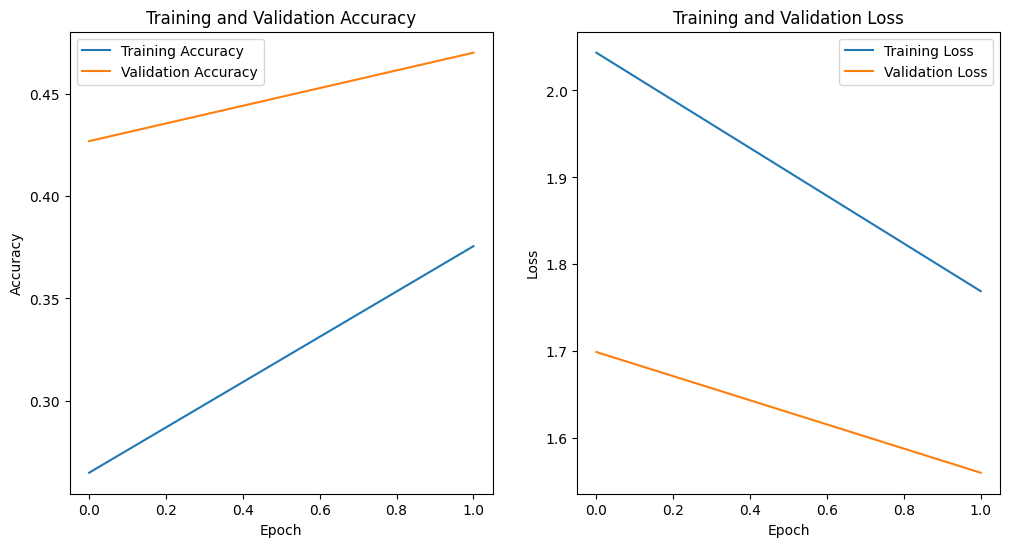

Evaluating the final model on the test dataset...
313/313 - 119s - 379ms/step - accuracy: 0.4701 - loss: 1.5602

Test accuracy: 47.01%


In [1]:
# Advanced Image Classification with Transfer Learning and Data Augmentation

# --- Section 1: Setup and Data Loading ---

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# --- Section 2: Building the Transfer Learning Model ---

print("Building the Transfer Learning model (VGG16)...")

# Load the VGG16 model, pre-trained on ImageNet.
# We set include_top=False to exclude the final classification layers.
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers to prevent them from being updated during training.
for layer in base_model.layers:
    layer.trainable = False

# Create the new model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Display the model's architecture
model.summary()

# --- Section 3: Data Augmentation ---

print("Applying data augmentation to the training data...")

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(train_images)

# --- Section 4: Compiling and Training ---

print("Compiling and training the model...")

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs= 2,
                    validation_data=(test_images, test_labels))

# --- Section 5: Visualizing and Evaluating Results ---

print("Visualizing model performance...")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Evaluating the final model on the test dataset...")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc*100:.2f}%')